In [1]:
import pandas as pd

In [3]:
# Load NYPD Motor Vehicle Collisions file
df = pd.read_csv("NYPD_Motor_Vehicle_Collisions.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542850 entries, 0 to 1542849
Data columns (total 29 columns):
DATE                             1542850 non-null object
TIME                             1542850 non-null object
BOROUGH                          1078103 non-null object
ZIP CODE                         1077920 non-null object
LATITUDE                         1351719 non-null float64
LONGITUDE                        1351719 non-null float64
LOCATION                         1351719 non-null object
ON STREET NAME                   1243443 non-null object
CROSS STREET NAME                1037526 non-null object
OFF STREET NAME                  207250 non-null object
NUMBER OF PERSONS INJURED        1542833 non-null float64
NUMBER OF PERSONS KILLED         1542819 non-null float64
NUMBER OF PEDESTRIANS INJURED    1542850 non-null int64
NUMBER OF PEDESTRIANS KILLED     1542850 non-null int64
NUMBER OF CYCLIST INJURED        1542850 non-null int64
NUMBER OF CYCLIST KILLED        

In [5]:
# Let's quickly analyze what we've got here ^
# 1.5 Million records
# 1 Million with Borough and Zip Code info >> in other words, we're missing 500k location records
# In case we have Location, we can do reverse Geocoding with GeoPY library and find out address (Borough + Zipcode)

# CLEANING

In [6]:
# Column header titles cleaning/renaming

# Number of persons injured is the total of injured (pedestrians + cyclists + motorists)
# If the number is 0, it means 0 injures and 0 deaths in an incident, but it's still a record

df.rename(columns = {'ZIP CODE'          : 'ZIP_CODE',
                       'ON STREET NAME'    : 'STREET_ON',
                       'CROSS STREET NAME' : 'STREET_CROSS',
                       'OFF STREET NAME'   : 'STREET_OFF',
                       'NUMBER OF PERSONS INJURED'     : 'TOTAL_INJURED',
                       'NUMBER OF PERSONS KILLED'      : 'TOTAL_KILLED',
                       'NUMBER OF PEDESTRIANS INJURED' : 'PED_INJURED',
                       'NUMBER OF PEDESTRIANS KILLED'  : 'PED_KILLED',
                       'NUMBER OF CYCLIST INJURED'     : 'CYC_INJURED',
                       'NUMBER OF CYCLIST KILLED'      : 'CYC_KILLED',
                       'NUMBER OF MOTORIST INJURED'    : 'MOTO_INJURED',
                       'NUMBER OF MOTORIST KILLED'     : 'MOTO_KILLED',
                       'CONTRIBUTING FACTOR VEHICLE 1' : 'VEH_FACTOR_1',
                       'CONTRIBUTING FACTOR VEHICLE 2' : 'VEH_FACTOR_2',
                       'CONTRIBUTING FACTOR VEHICLE 3' : 'VEH_FACTOR_3',
                       'CONTRIBUTING FACTOR VEHICLE 4' : 'VEH_FACTOR_4',
                       'CONTRIBUTING FACTOR VEHICLE 5' : 'VEH_FACTOR_5',
                       'UNIQUE KEY' : 'UNIQUE_KEY',
                       'VEHICLE TYPE CODE 1' : 'VEH_TYPE_1',
                       'VEHICLE TYPE CODE 2' : 'VEH_TYPE_2',
                       'VEHICLE TYPE CODE 3' : 'VEH_TYPE_3',
                       'VEHICLE TYPE CODE 4' : 'VEH_TYPE_4',
                       'VEHICLE TYPE CODE 5' : 'VEH_TYPE_5'},
           inplace = True) 

In [7]:
# Missing values in columns
df.isna().sum()

DATE                   0
TIME                   0
BOROUGH           464747
ZIP_CODE          464930
LATITUDE          191131
LONGITUDE         191131
LOCATION          191131
STREET_ON         299407
STREET_CROSS      505324
STREET_OFF       1335600
TOTAL_INJURED         17
TOTAL_KILLED          31
PED_INJURED            0
PED_KILLED             0
CYC_INJURED            0
CYC_KILLED             0
MOTO_INJURED           0
MOTO_KILLED            0
VEH_FACTOR_1        4024
VEH_FACTOR_2      206060
VEH_FACTOR_3     1443202
VEH_FACTOR_4     1522155
VEH_FACTOR_5     1537576
UNIQUE_KEY             0
VEH_TYPE_1          4989
VEH_TYPE_2        251569
VEH_TYPE_3       1413907
VEH_TYPE_4       1494330
VEH_TYPE_5       1532464
dtype: int64

In [8]:
# Borough and Zipcode are missing ~500k records >> ~30% which is significant and we can't disregard it
# I'll assign missing Borough records to NYC. It will be 5 boroughs and NYC to collect what's unassigned.

# Remove Total Injured and Total Killed NaN values
# TOTAL INJURED and TOTAL KILLED are > 0, otherwise it's justa a record, so let's keep only > 0 records

In [8]:
# Borough and Zipcode are missing ~500k records >> ~30% which is significant and we can't disregard it
# I'll assign missing Borough records to NYC. It will be 5 borougs and NYC to collect what's unassigned

# Remove Total Injured and Total Killed NaN values
# TOTAL INJURED and TOTAL KILLED are > 0, otherwise it's just a a record, so let's keep only > 0 records

In [9]:
# Fill all blank values in column Borough
# If a value is NaN it will be NYC
df.loc[df['BOROUGH'].isnull(), 'BOROUGH'] = 'NYC'

In [10]:
# Let's check it... BOROUGH should have 0 NaN values
df.isna().sum()

DATE                   0
TIME                   0
BOROUGH                0
ZIP_CODE          464930
LATITUDE          191131
LONGITUDE         191131
LOCATION          191131
STREET_ON         299407
STREET_CROSS      505324
STREET_OFF       1335600
TOTAL_INJURED         17
TOTAL_KILLED          31
PED_INJURED            0
PED_KILLED             0
CYC_INJURED            0
CYC_KILLED             0
MOTO_INJURED           0
MOTO_KILLED            0
VEH_FACTOR_1        4024
VEH_FACTOR_2      206060
VEH_FACTOR_3     1443202
VEH_FACTOR_4     1522155
VEH_FACTOR_5     1537576
UNIQUE_KEY             0
VEH_TYPE_1          4989
VEH_TYPE_2        251569
VEH_TYPE_3       1413907
VEH_TYPE_4       1494330
VEH_TYPE_5       1532464
dtype: int64

In [11]:
# Remove NaN from TOTAL INJURED
df = df.dropna(axis=0, subset=['TOTAL_INJURED'])

In [12]:
# Remove NaN from TOTAL KILLED
df = df.dropna(axis=0, subset=['TOTAL_KILLED'])

In [13]:
# Keep only > 0 values as df1
df1 = df[(df['TOTAL_INJURED'] > 0)]

In [14]:
# Keep only non-zero values as df2
df2 = df[(df['TOTAL_KILLED'] > 0)]

In [15]:
# Concatenate df1 and df2 and put it back as df; 0 values are now out
df = pd.concat([df1, df2])

In [16]:
# Combine DATE and TIME column to transform Series to DateTime needed for further analysis
df['DATE'] = df['DATE'] + ' ' + df['TIME']

In [17]:
# Convert string to DateTime
df['DATE'] = pd.to_datetime(df.DATE)

In [18]:
# Year filter
df['DATE_YEAR'] = pd.to_datetime(df['DATE']).dt.year

In [28]:
# Quarter filter
df['DATE_QUARTER'] = pd.to_datetime(df['DATE']).dt.quarter

In [19]:
# Month filter
df['DATE_MONTH'] = pd.to_datetime(df['DATE']).dt.month

In [20]:
# Day of the week filter
df['WEEKDAY'] = pd.to_datetime(df['DATE']).dt.weekday

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296563 entries, 7 to 1541976
Data columns (total 32 columns):
DATE             296563 non-null datetime64[ns]
TIME             296563 non-null object
BOROUGH          296563 non-null object
ZIP_CODE         204446 non-null object
LATITUDE         261996 non-null float64
LONGITUDE        261996 non-null float64
LOCATION         261996 non-null object
STREET_ON        252167 non-null object
STREET_CROSS     207731 non-null object
STREET_OFF       26534 non-null object
TOTAL_INJURED    296563 non-null float64
TOTAL_KILLED     296563 non-null float64
PED_INJURED      296563 non-null int64
PED_KILLED       296563 non-null int64
CYC_INJURED      296563 non-null int64
CYC_KILLED       296563 non-null int64
MOTO_INJURED     296563 non-null int64
MOTO_KILLED      296563 non-null int64
VEH_FACTOR_1     294636 non-null object
VEH_FACTOR_2     205290 non-null object
VEH_FACTOR_3     34657 non-null object
VEH_FACTOR_4     8965 non-null object
VEH_FA

In [22]:
# We have 294,934 relevant records instead of 1.5 million and our file is 68 MB from 340 MB at the beginning
# This file is now even readable with Excel

# Data Analysis & Visualisation

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# Year 2012 starts in July and for that reason it's incomplete and we can't use it in our analysis. 
# Let's filter out 2012 and leave 2019 just as a reference for a trend (today is mid-August 2019)
df = df[(df['DATE'] > '2013-01-01')]

# Injured per year

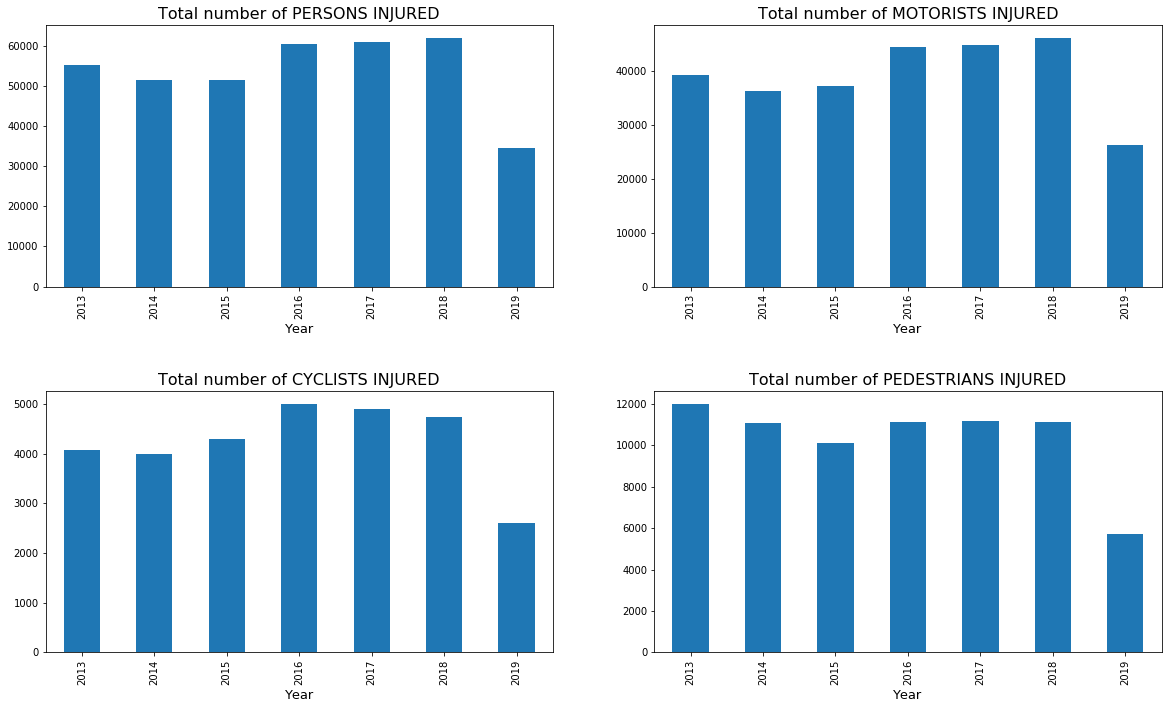

In [41]:
plt.figure(figsize=(20, 25)).subplots_adjust(hspace = 0.4)

# Total number of PERSONS injured
plt.subplot(4, 2 ,1)
df.groupby('DATE_YEAR').TOTAL_INJURED.sum().plot.bar()
plt.title('Total number of PERSONS INJURED', fontsize=16)
plt.xlabel('Year', fontsize=13)

# Total number of MOTORISTS injured
plt.subplot(4, 2, 2)
df.groupby('DATE_YEAR').MOTO_INJURED.sum().plot.bar()
plt.title('Total number of MOTORISTS INJURED', fontsize=16)
plt.xlabel('Year', fontsize=13)

# Total number of CYCLISTS injury
plt.subplot(4, 2 ,3)
df.groupby('DATE_YEAR').CYC_INJURED.sum().plot.bar()
plt.title('Total number of CYCLISTS INJURED', fontsize=16)
plt.xlabel('Year', fontsize=13)

# Total number of PEDESTRIANS injured
plt.subplot(4, 2, 4)
df.groupby('DATE_YEAR').PED_INJURED.sum().plot.bar()
plt.title('Total number of PEDESTRIANS INJURED', fontsize=16)
plt.xlabel('Year', fontsize=13)

plt.show()

# Killed per year

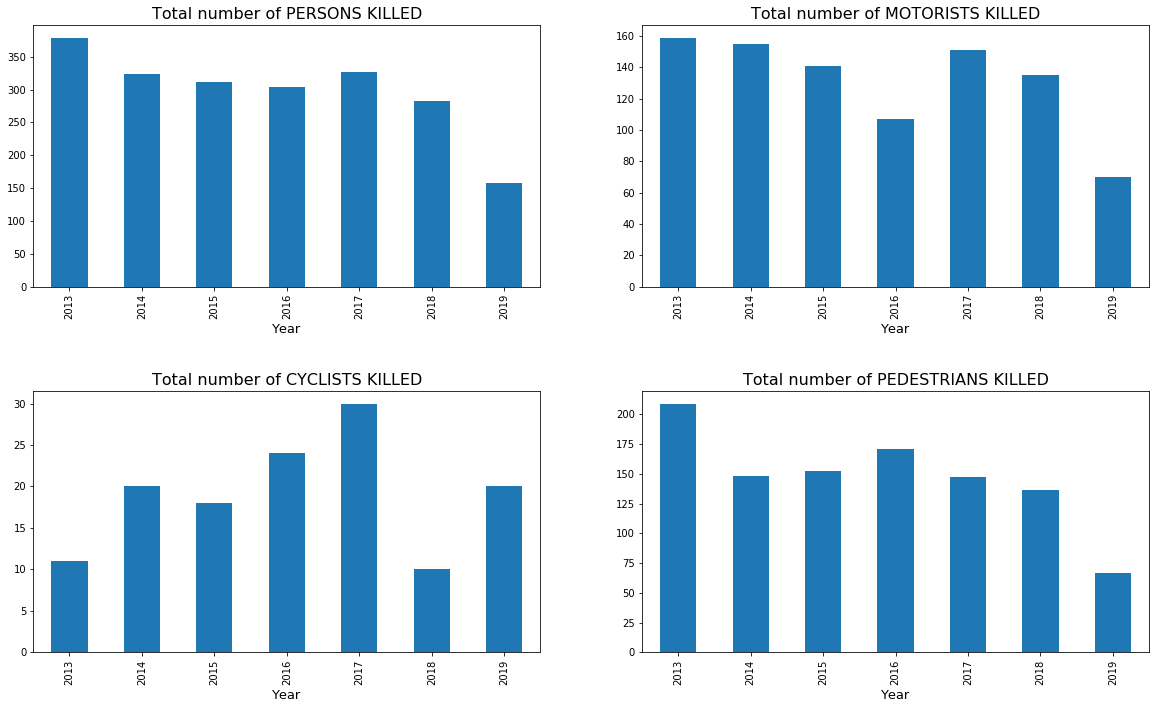

In [43]:
plt.figure(figsize=(20, 25)).subplots_adjust(hspace = 0.4)

# Total number of PERSONS killed
plt.subplot(4, 2 ,1)
df.groupby('DATE_YEAR').TOTAL_KILLED.sum().plot.bar()
plt.title('Total number of PERSONS KILLED', fontsize=16)
plt.xlabel('Year', fontsize=13)

# TTotal number of MOTORISTS killed
plt.subplot(4, 2, 2)
df.groupby('DATE_YEAR').MOTO_KILLED.sum().plot.bar()
plt.title('Total number of MOTORISTS KILLED', fontsize=16)
plt.xlabel('Year', fontsize=13)

# Total number of CYCLISTS killed
plt.subplot(4, 2 ,3)
df.groupby('DATE_YEAR').CYC_KILLED.sum().plot.bar()
plt.title('Total number of CYCLISTS KILLED', fontsize=16)
plt.xlabel('Year', fontsize=13)

# Total number of PEDESTRIANS killed
plt.subplot(4, 2, 4)
df.groupby('DATE_YEAR').PED_KILLED.sum().plot.bar()
plt.title('Total number of PEDESTRIANS KILLED', fontsize=16)
plt.xlabel('Year', fontsize=13)

plt.show()

# Number of people injured and killed per borough

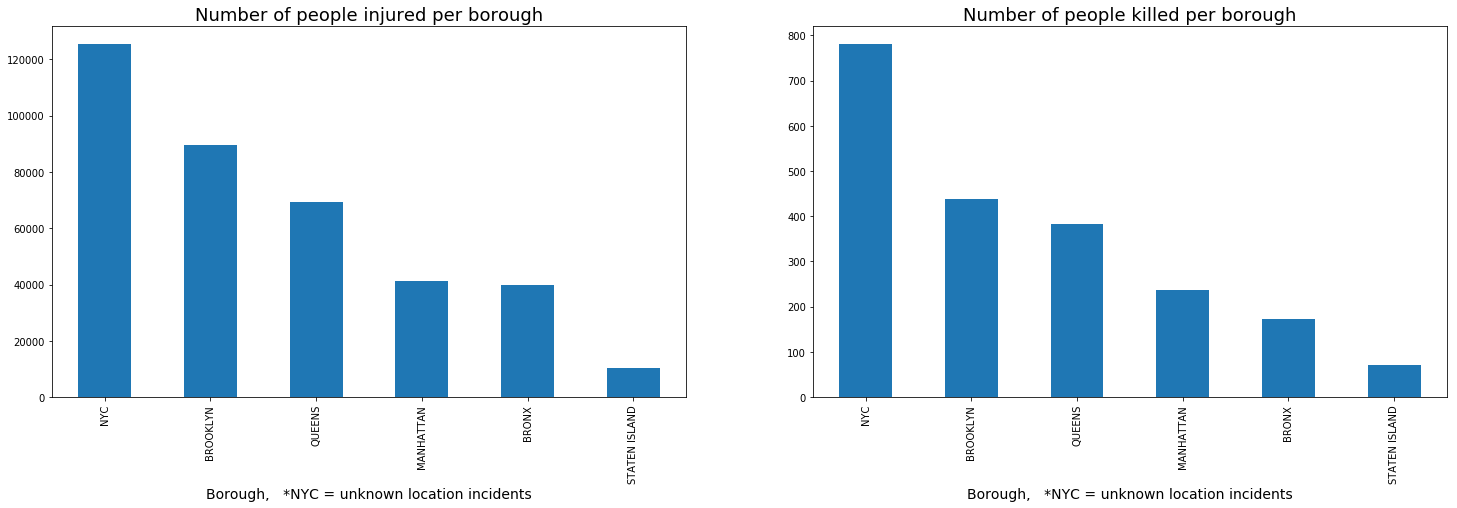

In [74]:
fig, ax = plt.subplots(1, figsize=(25, 15))

plt.subplot(2, 2 ,1)
df.groupby('BOROUGH').TOTAL_INJURED.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of people injured per borough', fontsize=18)
plt.xlabel('Borough,   *NYC = unknown location incidents', fontsize=14)

plt.subplot(2, 2 ,2)
df.groupby('BOROUGH').TOTAL_KILLED.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of people killed per borough', fontsize=18)
plt.xlabel('Borough,   *NYC = unknown location incidents', fontsize=14)

plt.show()

# Per quarter analysis

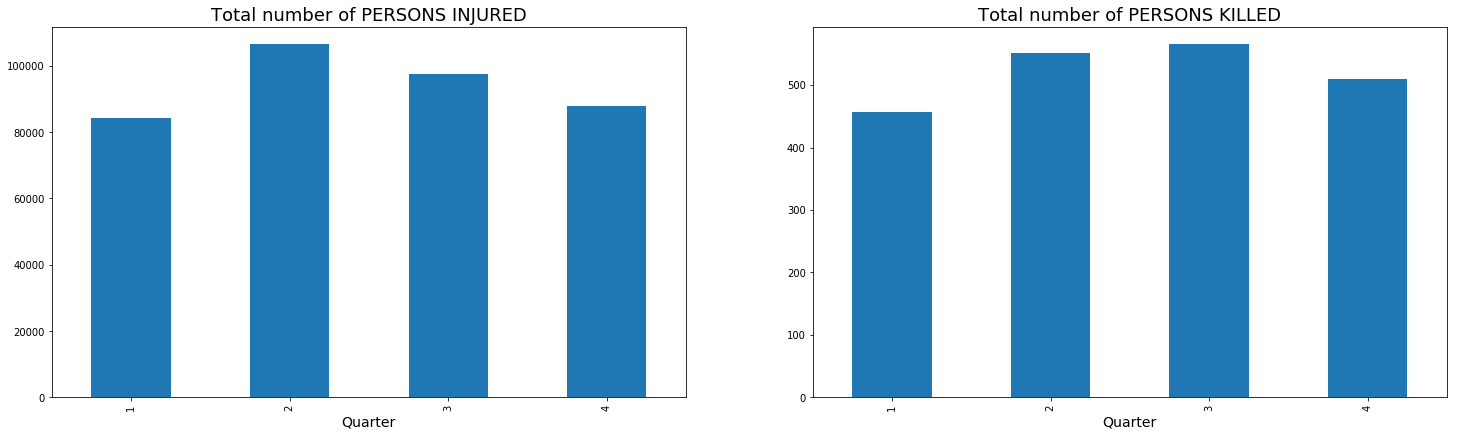

In [73]:
# Total number of injured and killed per quarter
fig, ax = plt.subplots(1, figsize=(25, 15))

plt.subplot(2, 2 ,1)
df.groupby('DATE_QUARTER').TOTAL_INJURED.sum().plot.bar()
plt.title('Total number of PERSONS INJURED', fontsize=18)
plt.xlabel('Quarter', fontsize=14)

plt.subplot(2, 2 ,2)
df.groupby('DATE_QUARTER').TOTAL_KILLED.sum().plot.bar()
plt.title('Total number of PERSONS KILLED', fontsize=18)
plt.xlabel('Quarter', fontsize=14)

plt.show()

# Day of the week analysis

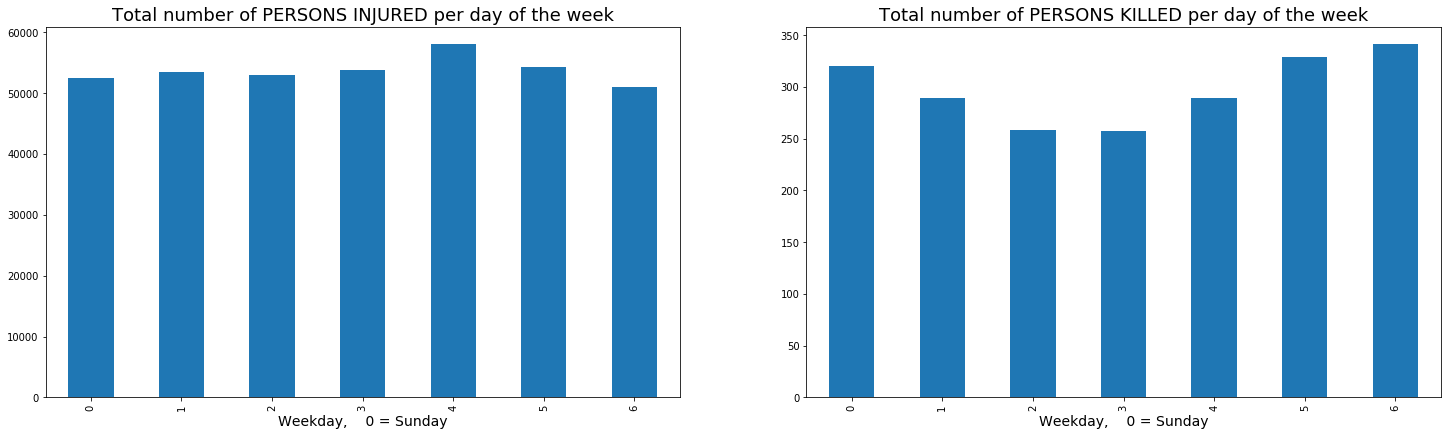

In [76]:
# Total number of injured and killed per quarter
fig, ax = plt.subplots(1, figsize=(25, 15))
plt.subplot(2, 2 ,1)
df.groupby('WEEKDAY').TOTAL_INJURED.sum().plot.bar()
plt.title('Total number of PERSONS INJURED per day of the week', fontsize=18)
plt.xlabel('Weekday,    0 = Sunday', fontsize=14)

plt.subplot(2, 2 ,2)
df.groupby('WEEKDAY').TOTAL_KILLED.sum().plot.bar()
plt.title('Total number of PERSONS KILLED per day of the week', fontsize=18)
plt.xlabel('Weekday,    0 = Sunday', fontsize=14)

plt.show()

# Filling Zip code & Borough data - Reverse Geocoding
- We can conduct the reverse Geocoding to obtain the address. All we need are the coordinates from column LOCATION (40.869335, -73.8255)

In [31]:
#--------------------------------------------------------------------------------
# Example code that works:
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="geoapiExercises")
# from tqdm import tqdm
# tqdm.pandas()
# geolocator = Nominatim(user_agent="specify_your_app_name_here")
# from geopy.extra.rate_limiter import RateLimiter
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=0.0, max_retries=2, error_wait_seconds=5.0, swallow_exceptions=True, return_value_on_exception=None)
# df['ADDRESS'] = df['LOCATION'].progress_apply(geocode)

# The down side: it will return only ~1,000 addresses per day
# With GeoPY is possible to fill all NaN values in ZIP CODE and BOROUGH
# Example: 
# Input: 40.88939, -73.89839 
# Output: Broadway, Fieldston, The Bronx, Bronx County, NYC, New York, 10463, USA
#--------------------------------------------------------------------------------